In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


# Data Wrangling

In [14]:
data.shape

(144, 2)

Variable Formatting

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [16]:
data['Month'] = pd.to_datetime(data['Month'])

In [17]:
data.rename(columns={'#Passengers':'Passengers'},  inplace=True)
data['Passengers'] = pd.to_numeric(data['Passengers'])

Check for null or missing numbers

In [18]:
data.isnull().sum()

Month         0
Passengers    0
dtype: int64

Check for duplicates

In [19]:
data.duplicated().sum()

0

In [20]:
data.describe(datetime_is_numeric=True)

,Month,Passengers
count,144,144.000000
mean,1954-12-16 05:00:00,280.298611
min,1949-01-01 00:00:00,104.000000
25%,1951-12-24 06:00:00,180.000000
50%,1954-12-16 12:00:00,265.500000
75%,1957-12-08 18:00:00,360.500000
max,1960-12-01 00:00:00,622.000000
std,NaN,119.966317


# Exploratory Data Analysis

In [21]:
data = data.set_index('Month')
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

<Figure size 720x576 with 0 Axes>

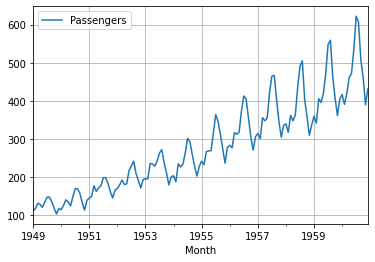

In [22]:
%matplotlib inline

plt.figure(figsize=(10,8))
data.plot(grid='on')

- The trend is generally increasing
- There is a bit of seasonality due to the flacuations.

In [23]:
data.index


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

<AxesSubplot:xlabel='Month'>

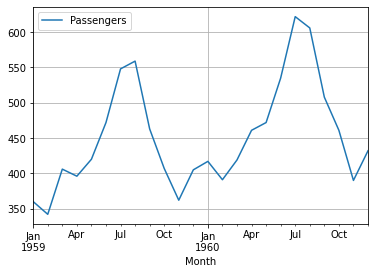

In [25]:
from datetime import datetime 

start_date = datetime(1959,1,1)
end_date = datetime(1960,12,1)
data[(start_date<=data.index) & (data.index <= end_date)].plot(grid='on')

### **Time Series Decomposition**

Additive Model 

Y(t) = Trend(t) + Seasonality(t) + Residual(t)

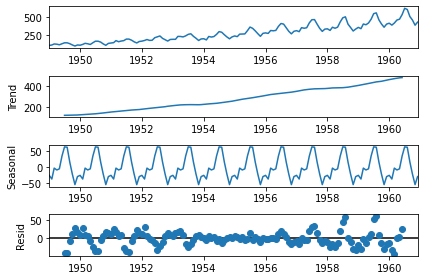

In [29]:
import statsmodels.api as sm 

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

plt.Figure(figsize=(20,10))
fig = decomposition.plot()

In [30]:
import matplotlib 

matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

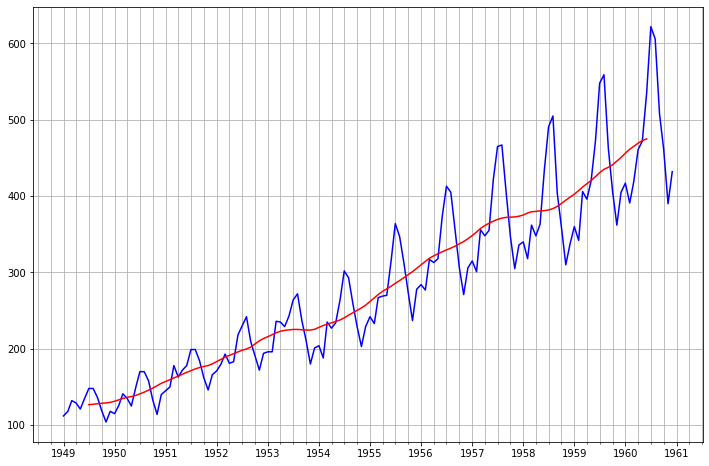

In [31]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval = 3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)

ax.xaxis.grid(True, which='minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(data.index, data['Passengers'], c = 'blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')